# Fastai Introduction

In this first notebook, we will install the fastai package into the planetary computer environment.<br>
If that works, it will be possible to train a visual CNN model directly on the planetary. Let's check.

<b>Note:</b> If using VSCode remotely, open the command palette (Crtl+Shift+P) and select "Jupiter: Specify jupyter server for connection" and enter the following key:<br>

`https://pccompute.westeurope.cloudapp.azure.com/compute/user/mauricio@ana.gov.br/?token=5767ade9e44c4b14923b1233fe9fd559`

At the bottom it should appear Jupyter Server: Remote

## Installing Fastai

To install fastai library we will use `mamba`

In [3]:
!mamba install -q -y -c fastchan fastai 

  Package            Version  Build           Channel                    Size
───────────────────────────────────────────────────────────────────────────────
  Install:
───────────────────────────────────────────────────────────────────────────────

  catalogue            1.0.0  py38h578d9bd_3  conda-forge/linux-64      13 KB
  cymem                2.0.6  py38hfa26641_3  fastchan/linux-64         42 KB
  cython-blis          0.7.8  py38h71d37f0_0  fastchan/linux-64          9 MB
  fastai               2.7.9  py_0            fastchan/noarch          170 KB
  fastcore            1.5.22  py_0            fastchan/noarch           58 KB
  fastdownload         0.0.7  py_0            fastchan/noarch           17 KB
  murmurhash           1.0.7  py38hfa26641_0  fastchan/linux-64         26 KB
  plac                 0.9.6  py_1            conda-forge/noarch        18 KB
  preshed              3.0.6  py38hfa26641_2  fastchan/linux-64        121 KB
  spacy                2.3.7  py38hfc89cab_0  co

## Checking Installation

We will check fastai version and download the PETs dataset

In [4]:
import fastai
from fastai.vision.all import *

In [3]:
unet_learner?

Signature:
unet_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    config=None,
    loss_func=None,
    opt_func=<function Adam at 0x7f48bd1ee670>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    *,
    cut=None,
    n_in=3,
    blur=False,
    blur_final=True,
    self_attention=False,
    y_range=None,
    last_cross=True,
    bottle=False,
    act_cls=<class 'torch.nn.modules.activation.ReLU'>,
    init=<function kaiming_normal_ at 0x7f48d1d08f70>,
    norm_type=None,
)
Docstring: Build a unet learner from `dls` and `arch`
File:      /srv/conda/envs/notebook/lib/python3.8/site-packages/fastai/vision/learner.py
Type:      function


In [5]:
fastai.__version__

'2.7.9'

In [12]:
untar_data??

Signature:
untar_data(
    url: 'str',
    archive: 'Path' = None,
    data: 'Path' = None,
    c_key: 'str' = 'data',
    force_download: 'bool' = False,
    base: 'str' = '~/.fastai',
) -> 'Path'
Source:   
def untar_data(
    url:str, # File to download
    archive:Path=None, # Optional override for `Config`'s `archive` key
    data:Path=None, # Optional override for `Config`'s `data` key
    c_key:str='data', # Key in `Config` where to extract file
    force_download:bool=False, # Setting to `True` will overwrite any existing copy of data
    base:str='~/.fastai' # Directory containing config file and base of relative paths
) -> Path: # Path to extracted file(s)
    "Download `url` using `FastDownload.get`"
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base=base)
    return d.get(url, force=force_download, extract_key=c_key)
File:      /srv/conda/envs/notebook/lib/python3.8/site-packages/fastai/data/external.py
Type:      function


In [14]:
path = untar_data(URLs.PETS, archive='/tmp')

In [15]:
path

Path('/home/jovyan/.fastai/data/oxford-iiit-pet')

In [16]:
path.ls()

(#2) [Path('/home/jovyan/.fastai/data/oxford-iiit-pet/images'),Path('/home/jovyan/.fastai/data/oxford-iiit-pet/annotations')]

In [17]:
files = get_image_files(path/"images")
len(files)

7390

## Cats vs Dogs

In [20]:
files[0],files[-60]

(Path('/home/jovyan/.fastai/data/oxford-iiit-pet/images/japanese_chin_48.jpg'),
 Path('/home/jovyan/.fastai/data/oxford-iiit-pet/images/Sphynx_76.jpg'))

In [21]:
def label_func(f): return f[0].isupper()

In [22]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

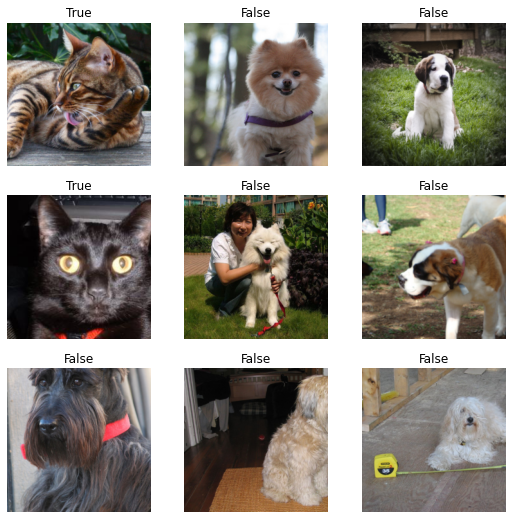

In [23]:
dls.show_batch()

In [24]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.156736,0.027619,0.006089,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.040794,0.019794,0.007442,00:31
1,0.039024,0.014426,0.004736,00:32
2,0.019673,0.007688,0.002030,00:32


In [25]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([9.9999e-01, 5.5974e-06]))

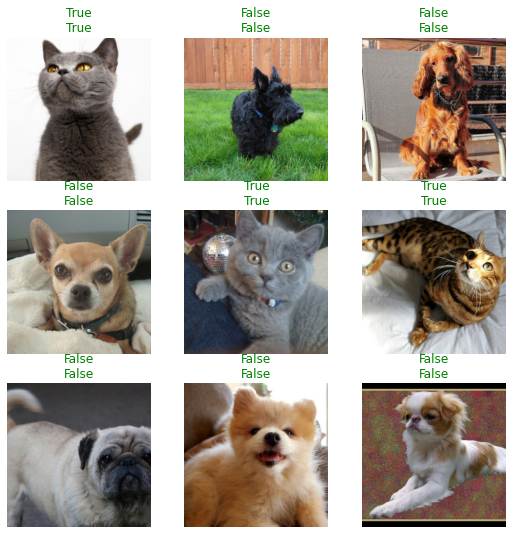

In [28]:
learn.show_results()

## Clean Files

In [35]:
!rm -r {path.as_posix()}

In [38]:
!rm ~/.fastai/archive/*

In [39]:
!df -H

Filesystem      Size  Used Avail Use% Mounted on
overlay         134G   49G   85G  37% /
tmpfs            68M     0   68M   0% /dev
tmpfs            15G     0   15G   0% /sys/fs/cgroup
/dev/sdc         16G  5.1G   11G  33% /home/jovyan
/dev/sda1       134G   49G   85G  37% /etc/hosts
tmpfs            26G  4.1k   26G   1% /dev/shm
tmpfs            15G   13k   15G   1% /proc/driver/nvidia
udev             15G     0   15G   0% /dev/nvidia0
tmpfs            15G     0   15G   0% /proc/acpi
tmpfs            15G     0   15G   0% /proc/scsi
tmpfs            15G     0   15G   0% /sys/firmware
